<a href="https://colab.research.google.com/github/vanyaagarwal29/Feature-Enginering/blob/main/Handling_Categorical_missing_value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Frequent Category Imputation**

In [3]:
import pandas as pd
df=pd.read_csv('train.csv', usecols = ['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice' ])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [7]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [8]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

<h3>Compute the frequency with every feature</h3>

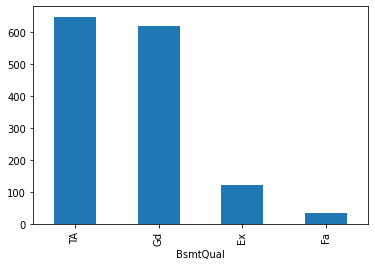

In [13]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

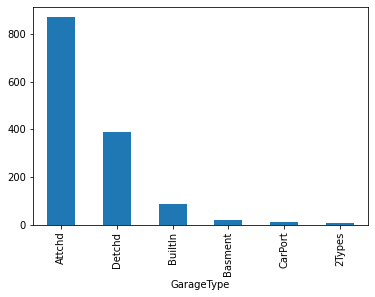

In [14]:
df.groupby(['GarageType'])['GarageType'].count().sort_values(ascending=False).plot.bar()

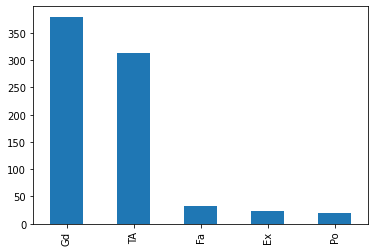

In [18]:
df['FireplaceQu'].value_counts().plot.bar()

In [20]:
#Whichever having the highest frequent variable for that specific feature
df['GarageType'].value_counts().index[0] 


'Attchd'

In [25]:
df['GarageType'].mode()[0]

'Attchd'

In [23]:
def impute_NAN(df, variable):
  most_frequent_category=df[variable].value_counts().index[0]
  df[variable].fillna(most_frequent_category,inplace=True)

for feature in['BsmtQual','FireplaceQu', 'GarageType']:
  impute_NAN(df,feature)

In [24]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

Advantage
1. Easy to implement
2. Faster way to implement

Disadvantage
1. Since we are using the more frequent labels, it may use them in an over represented way, if there are many nans.
2. It distorts the relation of the most frequent label.

<h3>Adding a variable to capture NAN</h3>

In [32]:
import pandas as pd
df=pd.read_csv('train.csv', usecols = ['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice' ])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [34]:
import numpy as np
df['BsmtQual_var']=np.where(df['BsmtQual'].isnull(),1,0)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [36]:
#Capturing the importance of the variable bsmtqual and handling the values with most frequent value. 
frequent=df['BsmtQual'].mode()[0]
df['BsmtQual'].fillna(frequent,inplace=True)

In [37]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0



Suppose if you have more frequent categories, we just replace NAN with a new category

In [38]:
import pandas as pd
df=pd.read_csv('train.csv', usecols = ['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice' ])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [40]:
def impute_NAN(df, variable):
  df[variable+'newvar']=np.where(df[variable].isnull(),"Missing",df[variable])

for feature in['BsmtQual','FireplaceQu', 'GarageType']:
  impute_NAN(df,feature)

In [48]:
df.head()

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
